## *Transformación de la Data*
---

In [5]:
import os
import pandas as pd
import numpy as np

os.chdir(r'C:\Users\thehe\OneDrive\Escritorio')
os.getcwd()

'C:\\Users\\thehe\\OneDrive\\Escritorio'

In [105]:
df = pd.read_csv('Municipal-Delitos - Junio 2025 (2015-2025).csv', encoding='latin-1')

df.fillna(0, inplace=True)  # Rellena los valores nulos con 0

for col in df.columns:
    if df[col].dtype == 'string':
        df[col] = df[col].astype('object')

for col in df.columns:
    if df[col].dtype == 'float':
        df[col] = df[col].astype('int64')

df.info() # Los datos están completos sin núlos, y los tipos se modificaron para funcionalidad.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2562994 entries, 0 to 2562993
Data columns (total 21 columns):
 #   Column                  Dtype 
---  ------                  ----- 
 0   Año                     int64 
 1   Clave_Ent               int64 
 2   Entidad                 object
 3   Cve. Municipio          int64 
 4   Municipio               object
 5   Bien jurídico afectado  object
 6   Tipo de delito          object
 7   Subtipo de delito       object
 8   Modalidad               object
 9   Enero                   int64 
 10  Febrero                 int64 
 11  Marzo                   int64 
 12  Abril                   int64 
 13  Mayo                    int64 
 14  Junio                   int64 
 15  Julio                   int64 
 16  Agosto                  int64 
 17  Septiembre              int64 
 18  Octubre                 int64 
 19  Noviembre               int64 
 20  Diciembre               int64 
dtypes: int64(15), object(6)
memory usage: 410.6+ MB


In [7]:
df.sample(5)

,Año,Clave_Ent,Entidad,Cve. Municipio,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,...,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
262277,2016,15,México,15088,Tenancingo,Libertad personal,Tráfico de menores,Tráfico de menores,Tráfico de menores,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1742442,2022,20,Oaxaca,20549,"Heroica Villa Tezoatlán de Segura y Luna, Cuna...",La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con otro elemento,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
171838,2015,30,Veracruz de Ignacio de la Llave,30201,Zongolica,El patrimonio,Robo,Robo de vehículo automotor,Robo de motocicleta Sin violencia,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1482384,2021,20,Oaxaca,20374,Santa Cruz Acatepec,La libertad y la seguridad sexual,Violación equiparada,Violación equiparada,Violación equiparada,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
326006,2016,26,Sonora,26037,Mazatán,El patrimonio,Robo,Robo en transporte público colectivo,Sin violencia,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
# Agregación de columna para sumar delitos totales por año

df['Suma_Delitos'] = df[['Enero','Febrero','Marzo','Abril',
                         'Mayo','Junio','Julio','Agosto',
                         'Septiembre','Octubre','Noviembre','Diciembre']].sum(axis=1)

df.sample(5)

,Año,Clave_Ent,Entidad,Cve. Municipio,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,...,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre,Suma_Delitos
1104795,2020,1,Aguascalientes,1004,Cosío,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,0,...,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
746777,2018,20,Oaxaca,20288,San Miguel Yotao,La vida y la Integridad corporal,Lesiones,Lesiones culposas,No especificado,0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2209626,2024,20,Oaxaca,20350,San Sebastián Tutla,La vida y la Integridad corporal,Feminicidio,Feminicidio,Con otro elemento,0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2425629,2025,20,Oaxaca,20068,Ocotlán de Morelos,Libertad personal,Otros delitos que atentan contra la libertad p...,Otros delitos que atentan contra la libertad p...,Otros delitos que atentan contra la libertad p...,0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
468641,2017,17,Morelos,17025,Tlaquiltenango,La vida y la Integridad corporal,Homicidio,Homicidio culposo,Con arma blanca,0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
# Eliminación de filas cuyo resultado total en delitos sea cero

df.drop(df[(df['Suma_Delitos'] == 0)].index, inplace=True)
df.reset_index(level=0, drop=True, inplace=True)
df.tail(5)

,Año,Clave_Ent,Entidad,Cve. Municipio,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,...,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre,Suma_Delitos
609137,2025,32,Zacatecas,32058,Santa María de la Paz,El patrimonio,Despojo,Despojo,Despojo,0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
609138,2025,32,Zacatecas,32058,Santa María de la Paz,La familia,Violencia familiar,Violencia familiar,Violencia familiar,1,...,1,0,1,NaN,NaN,NaN,NaN,NaN,NaN,3.0
609139,2025,32,Zacatecas,32058,Santa María de la Paz,Otros bienes jurídicos afectados (del fuero co...,Amenazas,Amenazas,Amenazas,0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2.0
609140,2025,32,Zacatecas,32058,Santa María de la Paz,Otros bienes jurídicos afectados (del fuero co...,Falsificación,Falsificación,Falsificación,0,...,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,1.0
609141,2025,32,Zacatecas,32058,Santa María de la Paz,Otros bienes jurídicos afectados (del fuero co...,Otros delitos del Fuero Común,Otros delitos del Fuero Común,Otros delitos del Fuero Común,0,...,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,3.0


In [10]:
# Filtrado de datos para obtener exclusivamente los delitos por robo de vehículo
# Extracción de la data a CSV para su valoración gráfica

filtro_robo = df['Tipo de delito'].str.contains('Robo').reset_index(drop=True) # Extracción de delitos tipo robo
robo = df[filtro_robo].reset_index(drop=True)
robo2 = df['Subtipo de delito'].str.contains('Robo de vehículo automotor') # Extraccción de delitos por robo de vehiculos
robo_vehiculos = df[robo2].reset_index(drop=True)
df_robos = pd.DataFrame(robo_vehiculos).fillna('').reset_index(drop=True)
df_robos

# df_robos.to_csv('RobosVehiculares.csv', sep=',', index=False, encoding='latin-1')

,Año,Clave_Ent,Entidad,Cve. Municipio,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,...,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre,Suma_Delitos
0,2015,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,4,...,3,0,1,1.0,5.0,2.0,5.0,6.0,4.0,36.0
1,2015,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Sin violencia,114,...,124,138,94,89.0,93.0,126.0,105.0,152.0,171.0,1434.0
2,2015,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de motocicleta Con violencia,1,...,0,0,0,0.0,2.0,0.0,0.0,1.0,0.0,5.0
3,2015,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de motocicleta Sin violencia,23,...,20,23,17,8.0,33.0,29.0,33.0,39.0,34.0,304.0
4,2015,1,Aguascalientes,1002,Asientos,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,0,...,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43854,2025,32,Zacatecas,32056,Zacatecas,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Sin violencia,14,...,8,9,12,,,,,,,51.0
43855,2025,32,Zacatecas,32056,Zacatecas,El patrimonio,Robo,Robo de vehículo automotor,Robo de motocicleta Con violencia,1,...,2,0,0,,,,,,,3.0
43856,2025,32,Zacatecas,32056,Zacatecas,El patrimonio,Robo,Robo de vehículo automotor,Robo de motocicleta Sin violencia,10,...,2,5,0,,,,,,,20.0
43857,2025,32,Zacatecas,32057,Trancoso,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,0,...,0,0,0,,,,,,,1.0


## *Análisis de series de tiempo*
---

In [11]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os

# ----------------------------------------------
from pylab import rcParams
from chart_studio import plotly as py
from chart_studio import grid_objs
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

import plotly.graph_objs as go
import plotly.figure_factory as ff
import statsmodels.api as sm
from numpy.random import normal, seed
from scipy.stats import norm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import math
from sklearn.metrics import mean_squared_error
# ----------------------------------------------
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff
from scipy.stats import norm
import math
from sklearn.metrics import mean_squared_error
from matplotlib import rcParams
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess

os.chdir(r'C:\Users\thehe\OneDrive\Escritorio')

df = pd.read_csv('RobosVehiculares.csv', encoding='latin-1') # , index_col=0, parse_dates=True
df.sample(5)

,Año,Clave_Ent,Entidad,Cve. Municipio,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,...,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre,Suma_Delitos
33270,2023,15,México,15106,Toluca,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,25,...,15,22,29,23.0,33.0,38.0,45.0,55.0,45.0,386.0
13004,2018,21,Puebla,21079,Huitziltepec,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,0,...,0,0,0,0.0,1.0,0.0,0.0,1.0,0.0,2.0
40899,2025,11,Guanajuato,11024,Pueblo Nuevo,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Sin violencia,1,...,0,1,1,NaN,NaN,NaN,NaN,NaN,NaN,5.0
20915,2020,19,Nuevo León,19031,Juárez,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Sin violencia,1,...,4,9,7,7.0,3.0,3.0,6.0,11.0,7.0,71.0
19232,2020,9,Ciudad de México,9004,Cuajimalpa de Morelos,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Sin violencia,3,...,4,4,6,2.0,2.0,8.0,8.0,7.0,5.0,58.0


In [12]:
# Llenado de valores nulos
df.fillna(0, inplace=True)

# Transformación de columnas float a int
for col in df.columns:
    if df[col].dtype == 'float64':
        df[col] = df[col].astype('int64')
        
df['Clave_Ent'] = df['Clave_Ent'].astype('object')
df['Cve. Municipio'] = df['Cve. Municipio'].astype('object') 
        
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43859 entries, 0 to 43858
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Año                     43859 non-null  int64 
 1   Clave_Ent               43859 non-null  object
 2   Entidad                 43859 non-null  object
 3   Cve. Municipio          43859 non-null  object
 4   Municipio               43859 non-null  object
 5   Bien jurídico afectado  43859 non-null  object
 6   Tipo de delito          43859 non-null  object
 7   Subtipo de delito       43859 non-null  object
 8   Modalidad               43859 non-null  object
 9   Enero                   43859 non-null  int64 
 10  Febrero                 43859 non-null  int64 
 11  Marzo                   43859 non-null  int64 
 12  Abril                   43859 non-null  int64 
 13  Mayo                    43859 non-null  int64 
 14  Junio                   43859 non-null  int64 
 15  Ju

In [107]:
print(df.shape)

# Comando para reducir dígitos y obtener mayor legibilidad
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df.describe().T

(2562994, 21)


,count,mean,std,min,25%,50%,75%,max
Año,2562994.00,2020.19,3.09,2015.00,2018.00,2020.00,2023.00,2025.00
Clave_Ent,2562994.00,19.20,7.51,1.00,14.00,20.00,24.00,32.00
Cve. Municipio,2562994.00,19308.69,7525.47,1001.00,14056.00,20217.00,24055.00,32058.00
Enero,2562994.00,0.67,8.00,0.00,0.00,0.00,0.00,1760.00
Febrero,2562994.00,0.67,7.88,0.00,0.00,0.00,0.00,1479.00
Marzo,2562994.00,0.74,8.71,0.00,0.00,0.00,0.00,1712.00
Abril,2562994.00,0.70,8.28,0.00,0.00,0.00,0.00,1791.00
Mayo,2562994.00,0.73,8.65,-1.00,0.00,0.00,0.00,1727.00
Junio,2562994.00,0.72,8.55,0.00,0.00,0.00,0.00,1897.00
Julio,2562994.00,0.64,8.06,0.00,0.00,0.00,0.00,1612.00


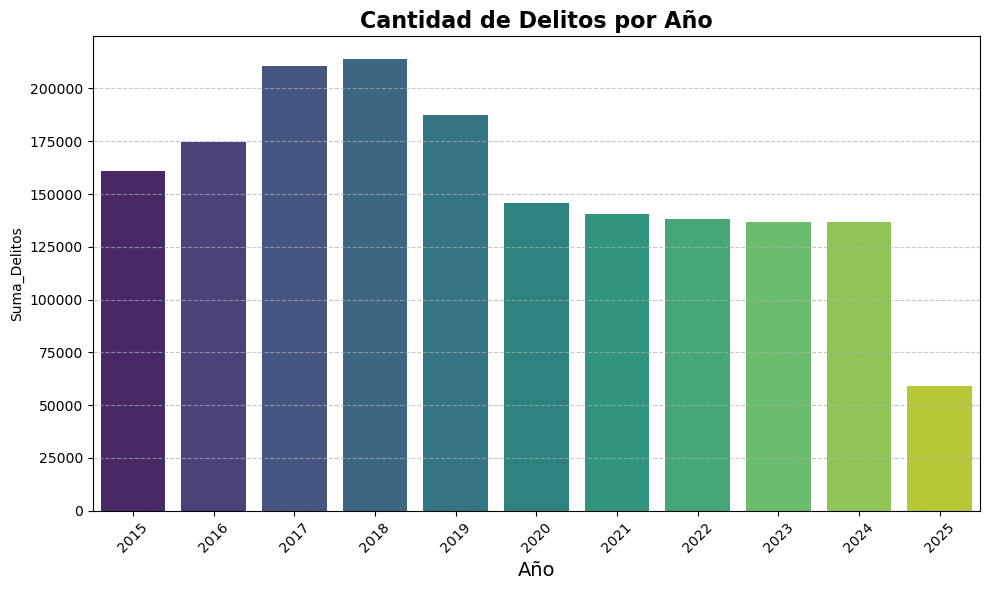

In [112]:
plt.figure(figsize=(10,6))
ax = sns.barplot(
    x='Año',
    y='Suma_Delitos',
    data=df3.groupby('Año')['Suma_Delitos'].sum().reset_index(),
    palette='viridis'
)
ax.set_title('Cantidad de Delitos por Año', fontsize=16, fontweight='bold')
ax.set_xlabel('Año', fontsize=14)
# ax.set_ylabel('Total de Delitos', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [115]:
# +++ Movimiento Browniano +++

# Parámetros del Movimiento Browniano
delta = df3['Suma_Delitos'].std()
dt = 1

# Punto de partida
x = 0
x_ini = 0

# Número de pasos 
n = 10

# Generación de puntos de la serie
for k in range(n):
    x = x + norm.rvs(scale=delta ** 2 * dt)
    print(x)
    
# Trayectorias e iteraciones
n_tray = 10
n_iter = 20

-37087.71239141477
18093.266827955173
52293.57313617978
90061.05213645953
76907.76915069975
85054.93511819938
149454.1828181949
179501.4311898625
142009.0786707406
190752.5750280979


In [16]:
resid = []
df_res = pd.DataFrame().assign(traj=0, nsample=0, sample=0)

# Inducción de las trayectorias en el DataFrame
for i in range(n_tray+1):
    for k in range(1,n_iter+1):
        x = x + norm.rvs(scale=delta ** 2 * dt)
        resid.append(x)
        df2 = pd.DataFrame([{'traj': i, 'nsample': k, 'sample': x}])
        df_res = pd.concat([df_res, df2], ignore_index=True)
        
df_res.tail(5)

,traj,nsample,sample
215,10,16,0.12
216,10,17,0.13
217,10,18,0.12
218,10,19,0.11
219,10,20,0.12


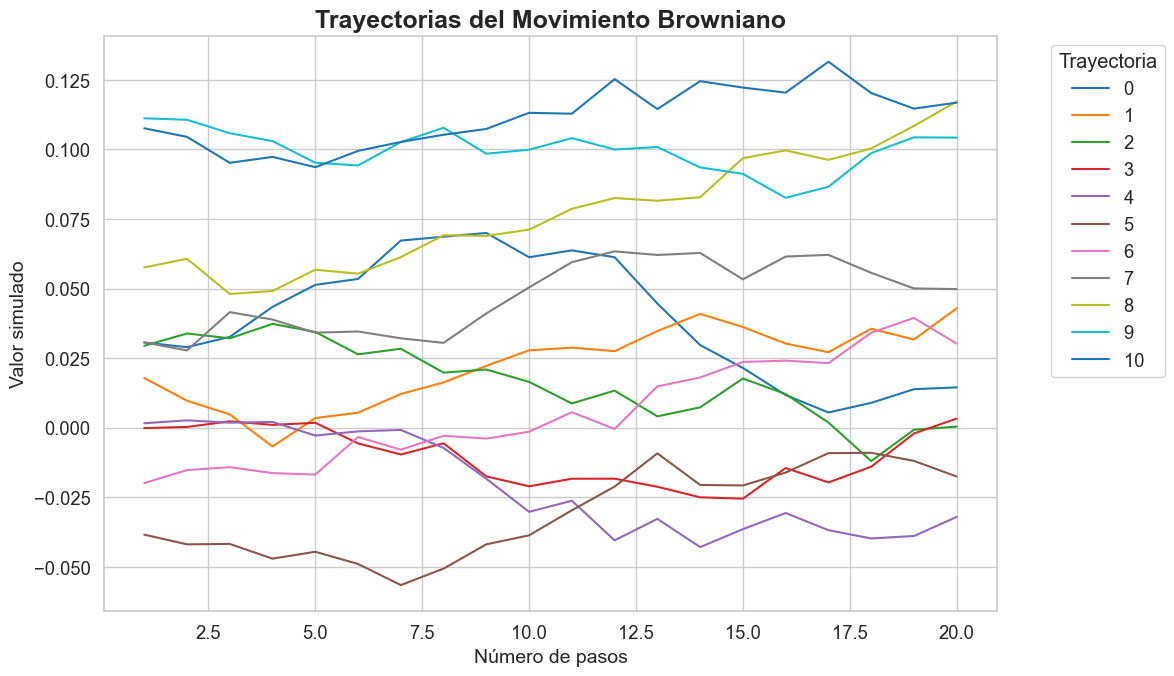

In [116]:
sns.set(style="whitegrid", font_scale=1.2)
plt.figure(figsize=(12,7))
ax = sns.lineplot(
    x='nsample',
    y='sample',
    hue='traj',
    data=df_res,
    palette='tab10',
    legend='full'
)
ax.set_title('Trayectorias del Movimiento Browniano', fontsize=18, fontweight='bold')
ax.set_xlabel('Número de pasos', fontsize=14)
ax.set_ylabel('Valor simulado', fontsize=14)
plt.legend(title='Trayectoria', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [121]:
def vasicek(r0, kappa, theta, sigma, T=1, N=10, dt=10, seed=df3['Suma_Delitos'].mean()):
    dt = T / float(N)
    rates = [r0]
    for i in range(N):
        dr = kappa * (theta - rates[-1]) * dt + sigma * df3['Suma_Delitos'].std() * np.sqrt(dt) * norm.rvs()
        rates.append(rates[-1] + dr)
    return range(N + 1), rates

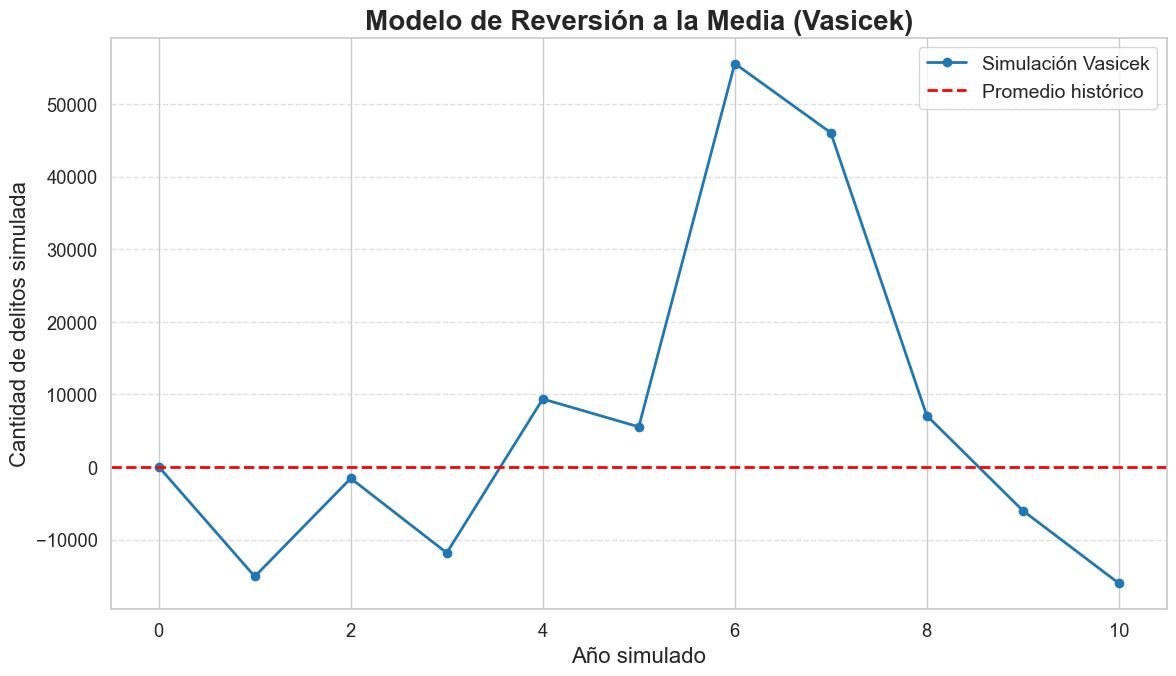

In [125]:
r0 = df3['Suma_Delitos'].mean()
kappa = 0.3
theta = df3['Suma_Delitos'].mean()
sigma = df3['Suma_Delitos'].std()
T = 10
N = 10

x, y = vasicek(r0, kappa, theta, sigma, T, N)

# Plot de la serie
plt.figure(figsize=(12, 7))
plt.plot(x, y, marker='o', color='#1f77b4', linewidth=2, label='Simulación Vasicek')
plt.axhline(theta, color='red', linestyle='--', linewidth=2, label='Promedio histórico')
plt.title('Modelo de Reversión a la Media (Vasicek)', fontsize=20, fontweight='bold')
plt.xlabel('Año simulado', fontsize=16)
plt.ylabel('Cantidad de delitos simulada', fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(fontsize=14, loc='upper right')
plt.tight_layout()
plt.show()

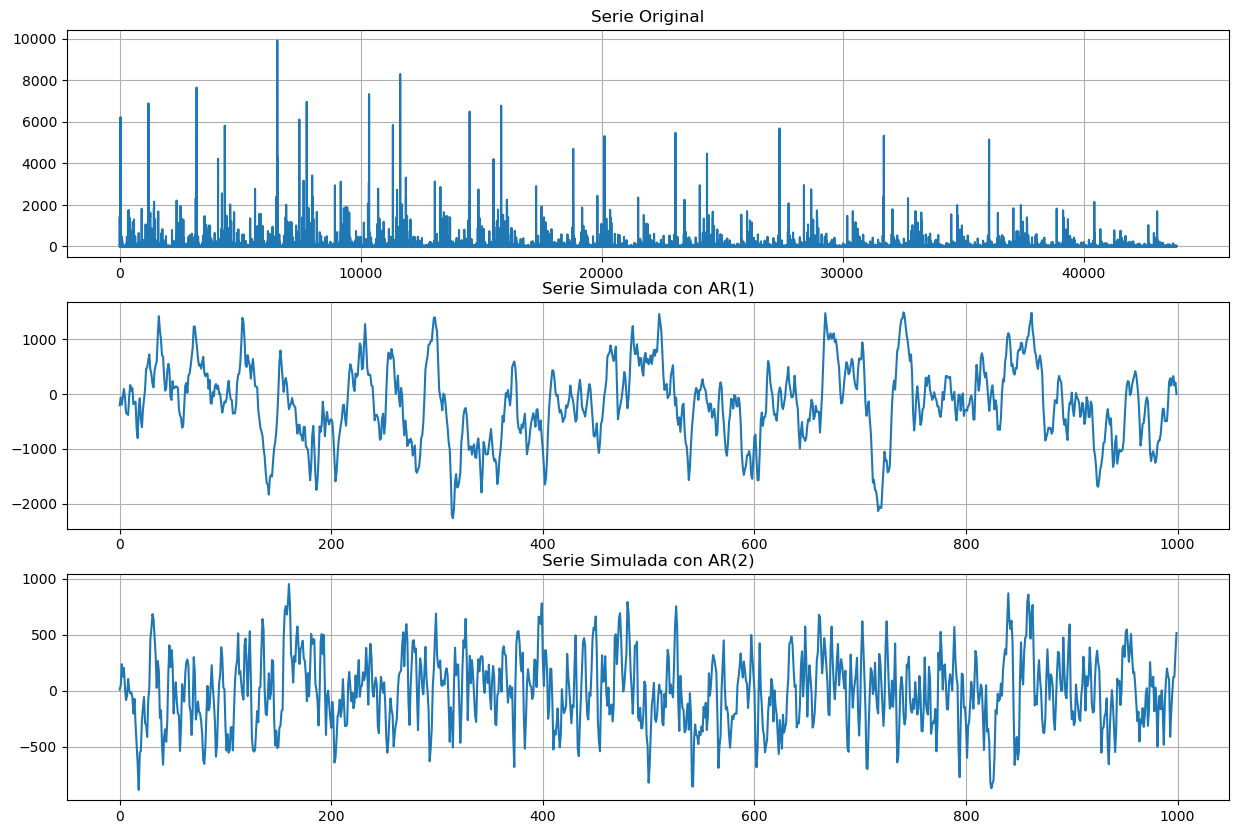

In [20]:
# +++ Modelo autorregresivo +++

rcParams['figure.figsize'] = 15,10
rcParams['axes.grid'] = True
plt.subplot(3,1,1)

plt.plot(df['Suma_Delitos'], label='Serie Original')
plt.title('Serie Original')

plt.subplot(3,1,2)
ar1 = np.array([1, -0.9])
ma1 = np.array([1, 0.5])
AR1 = ArmaProcess(ar1, ma1)
sim1 = AR1.generate_sample(nsample=1000, scale=df['Suma_Delitos'].std())
plt.title('Serie Simulada con AR(1)')
plt.plot(sim1, label='Serie Simulada')

plt.subplot(3,1,3)
ar2 = np.array([1, -0.5])
ma2 = np.array([1, 0.5])
AR2 = ArmaProcess(ar2, ma2)
sim2 = AR2.generate_sample(nsample=1000, scale=df['Suma_Delitos'].std())
plt.title('Serie Simulada con AR(2)')
plt.plot(sim2, label='Serie Simulada')

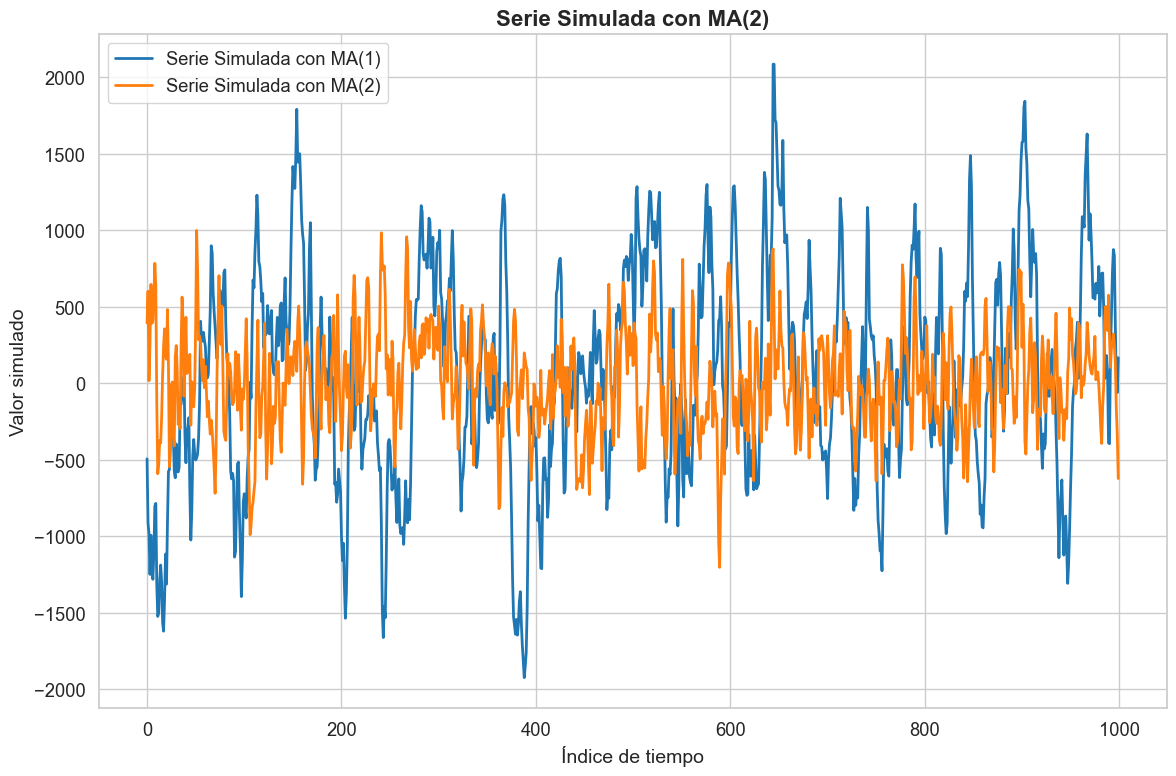

In [126]:
# +++ Moving Average +++

rcParams['figure.figsize'] = 12,8
rcParams['axes.grid'] = True

# Ajusta los parámetros usando df3['Suma_Delitos']
ar1 = np.array([1, -0.9])
ma1 = np.array([1, 0.5])
MA1 = ArmaProcess(ar1, ma1)
sim1 = MA1.generate_sample(nsample=1000, scale=df3['Suma_Delitos'].std())
plt.plot(sim1, label='Serie Simulada con MA(1)', color='#1f77b4', linewidth=2)
plt.title('Serie Simulada con MA(1)', fontsize=16, fontweight='bold')
plt.legend()

ar2 = np.array([1, -0.5])
ma2 = np.array([1, 0.5])
MA2 = ArmaProcess(ar2, ma2)
sim2 = MA2.generate_sample(nsample=1000, scale=df3['Suma_Delitos'].std())
plt.plot(sim2, label='Serie Simulada con MA(2)', color='#ff7f0e', linewidth=2)
plt.title('Serie Simulada con MA(2)', fontsize=16, fontweight='bold')
plt.legend()
plt.xlabel('Índice de tiempo', fontsize=14)
plt.ylabel('Valor simulado', fontsize=14)
plt.tight_layout()
plt.show()

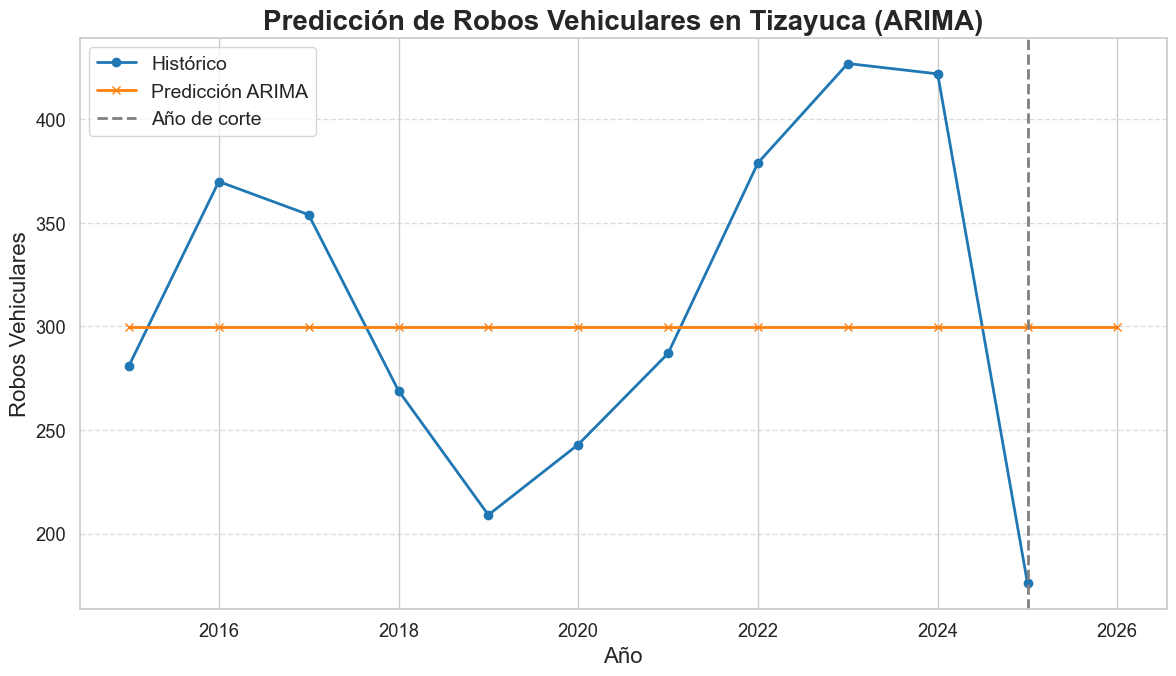

In [128]:
from statsmodels.tsa.arima.model import ARIMA

municipio = "Tizayuca"
df_mun = df3[df3['Municipio'] == municipio].copy()

# Asegúrate que 'Año' sea tipo int
df_mun['Año'] = df_mun['Año'].astype(int)

# Agrupa y ordena por año, y usa años como índice entero
serie = df_mun.groupby('Año')['Suma_Delitos'].sum().sort_index()
serie.index = serie.index.astype(int)  # <- Esto es clave

# Modelo ARIMA
modelo = ARIMA(serie, order=(1,1,1))
resultado = modelo.fit()

# Predice para el año 2026
pred = resultado.predict(start=serie.index.min(), end=2026)
 
plt.figure(figsize=(12, 7))
plt.plot(serie.index, serie, marker='o', color='#1f77b4', linewidth=2, label='Histórico')
plt.plot(pred.index, pred, marker='x', color='#ff7f0e', linewidth=2, label='Predicción ARIMA')
plt.axvline(2025, color='gray', linestyle='--', linewidth=2, label='Año de corte')
plt.title(f'Predicción de Robos Vehiculares en {municipio} (ARIMA)', fontsize=20, fontweight='bold')
plt.xlabel('Año', fontsize=16)
plt.ylabel('Robos Vehiculares', fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(fontsize=14, loc='upper left', frameon=True)
plt.tight_layout()
plt.show()

## Clustering
---

In [23]:
# Básicas
# ---------------------------------------
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')

# Clustering
# ---------------------------------------
import statsmodels.api as sm
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import single, cophenet
from scipy.spatial.distance import pdist, squareform
from scipy.spatial.distance import cdist
#----------------------------------------------------

df.head(5)

,Año,Clave_Ent,Entidad,Cve. Municipio,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,...,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre,Suma_Delitos
0,2015,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,4,...,3,0,1,1,5,2,5,6,4,36
1,2015,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Sin violencia,114,...,124,138,94,89,93,126,105,152,171,1434
2,2015,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de motocicleta Con violencia,1,...,0,0,0,0,2,0,0,1,0,5
3,2015,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de motocicleta Sin violencia,23,...,20,23,17,8,33,29,33,39,34,304
4,2015,1,Aguascalientes,1002,Asientos,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,0,...,0,0,0,0,0,0,1,0,1,2


#### Feature Engineering

In [24]:
print(df.shape)
df.info()

(43859, 22)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43859 entries, 0 to 43858
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Año                     43859 non-null  int64 
 1   Clave_Ent               43859 non-null  object
 2   Entidad                 43859 non-null  object
 3   Cve. Municipio          43859 non-null  object
 4   Municipio               43859 non-null  object
 5   Bien jurídico afectado  43859 non-null  object
 6   Tipo de delito          43859 non-null  object
 7   Subtipo de delito       43859 non-null  object
 8   Modalidad               43859 non-null  object
 9   Enero                   43859 non-null  int64 
 10  Febrero                 43859 non-null  int64 
 11  Marzo                   43859 non-null  int64 
 12  Abril                   43859 non-null  int64 
 13  Mayo                    43859 non-null  int64 
 14  Junio                   43859 non-null  in

In [25]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Año,43859.00,2020.17,3.03,2015.00,2018.00,2020.00,2023.00,2025.00
Enero,43859.00,3.53,18.66,0.00,0.00,0.00,1.00,943.00
Febrero,43859.00,3.23,17.09,0.00,0.00,0.00,1.00,883.00
Marzo,43859.00,3.44,18.02,0.00,0.00,0.00,1.00,908.00
Abril,43859.00,3.16,16.66,0.00,0.00,0.00,1.00,932.00
Mayo,43859.00,3.32,17.68,-1.00,0.00,0.00,1.00,983.00
Junio,43859.00,3.24,16.91,0.00,0.00,0.00,1.00,718.00
Julio,43859.00,3.11,17.06,0.00,0.00,0.00,1.00,805.00
Agosto,43859.00,3.16,17.41,0.00,0.00,0.00,1.00,845.00
Septiembre,43859.00,3.09,16.61,0.00,0.00,0.00,1.00,740.00


In [26]:
print(f'Existe una presencia de {df.isnull().sum().sum()} valores nulos')

Existe una presencia de 0 valores nulos


In [27]:
df.nunique()

Año                         11
Clave_Ent                   32
Entidad                     32
Cve. Municipio            2148
Municipio                 2010
Bien jurídico afectado       1
Tipo de delito               1
Subtipo de delito            1
Modalidad                    6
Enero                      231
Febrero                    216
Marzo                      226
Abril                      211
Mayo                       217
Junio                      216
Julio                      217
Agosto                     221
Septiembre                 214
Octubre                    215
Noviembre                  222
Diciembre                  216
Suma_Delitos               951
dtype: int64

In [79]:
# Copias del DataFrame original
# ----------------------------------------------
df2 = df.copy()
# ----------------------------------------------
df3= df.copy()
# ----------------------------------------------

In [80]:
# Eliminiación de columnas innecesarias para el modelo
# Se elimina también la variable "Suma Delitos" que realiza la suma total de delitos cada año por municipio
df2.drop(columns=['Año', 'Bien jurídico afectado', 'Tipo de delito', 'Subtipo de delito', 'Suma_Delitos'], inplace=True)
df2.sample(3)

,Clave_Ent,Entidad,Cve. Municipio,Municipio,Modalidad,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
40243,30,Veracruz de Ignacio de la Llave,30205,El Higo,Robo de coche de 4 ruedas Con violencia,0,0,1,0,0,1,0,0,0,0,0,0
23179,7,Chiapas,7007,Amatenango del Valle,Robo de coche de 4 ruedas Con violencia,0,0,0,0,0,0,0,2,0,0,0,0
4645,16,Michoacán de Ocampo,16001,Acuitzio,Robo de coche de 4 ruedas Sin violencia,0,0,0,0,1,0,1,0,0,0,0,1


In [81]:
# Escalamiento "Zscore"

num_cols = df2.select_dtypes(include=[np.number]).columns

# Aplica zscore solo a las columnas numéricas
df2[num_cols] = df2[num_cols].apply(zscore)

df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Enero,43859.00,0.00,1.00,-0.19,-0.19,-0.19,-0.14,50.34
Febrero,43859.00,-0.00,1.00,-0.19,-0.19,-0.19,-0.13,51.49
Marzo,43859.00,-0.00,1.00,-0.19,-0.19,-0.19,-0.14,50.19
Abril,43859.00,0.00,1.00,-0.19,-0.19,-0.19,-0.13,55.74
Mayo,43859.00,0.00,1.00,-0.24,-0.19,-0.19,-0.13,55.42
Junio,43859.00,0.00,1.00,-0.19,-0.19,-0.19,-0.13,42.27
Julio,43859.00,-0.00,1.00,-0.18,-0.18,-0.18,-0.12,47.00
Agosto,43859.00,-0.00,1.00,-0.18,-0.18,-0.18,-0.12,48.35
Septiembre,43859.00,0.00,1.00,-0.19,-0.19,-0.19,-0.13,44.36
Octubre,43859.00,0.00,1.00,-0.18,-0.18,-0.18,-0.13,43.18


In [82]:
# Generacion de variable para columnas numéricas
# ----------------------------------------------
cols_num = df2.select_dtypes(include=[np.number]).columns
print(cols_num)
print(len(cols_num))
# ----------------------------------------------

Index(['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio',
       'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'],
      dtype='object')
12


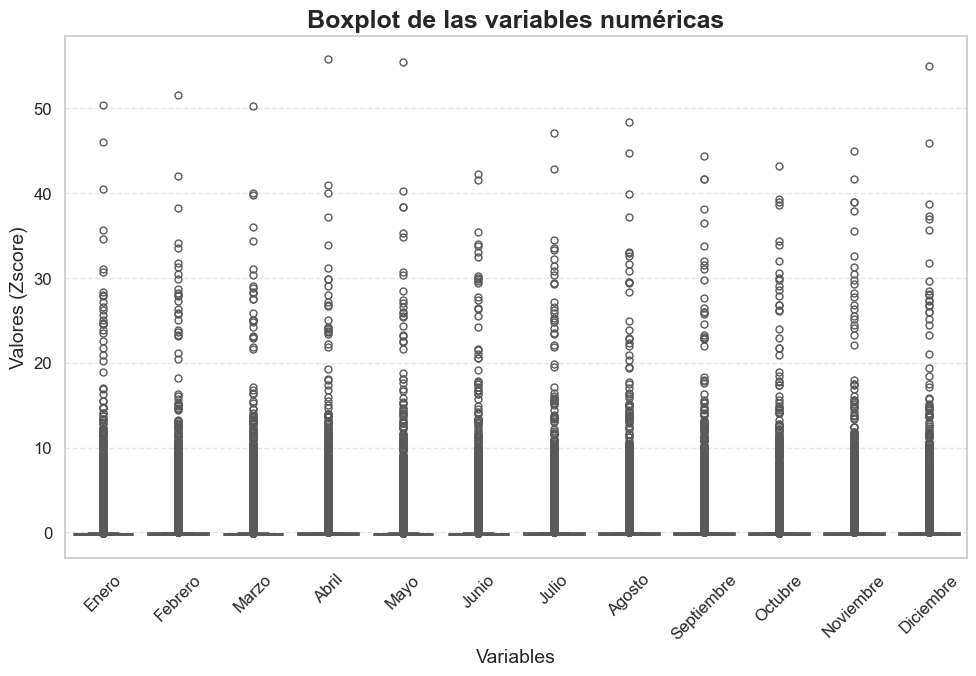

In [129]:
# Boxplot para detectar outliers

plt.figure(figsize=(10,7))
ax = sns.boxplot(data=df2[cols_num], palette="Set2", linewidth=2, fliersize=5)
ax.set_title('Boxplot de las variables numéricas', fontsize=18, fontweight='bold')
ax.set_xlabel('Variables', fontsize=14)
ax.set_ylabel('Valores (Zscore)', fontsize=14)
ax.tick_params(axis='x', labelsize=12, rotation=45)
ax.tick_params(axis='y', labelsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

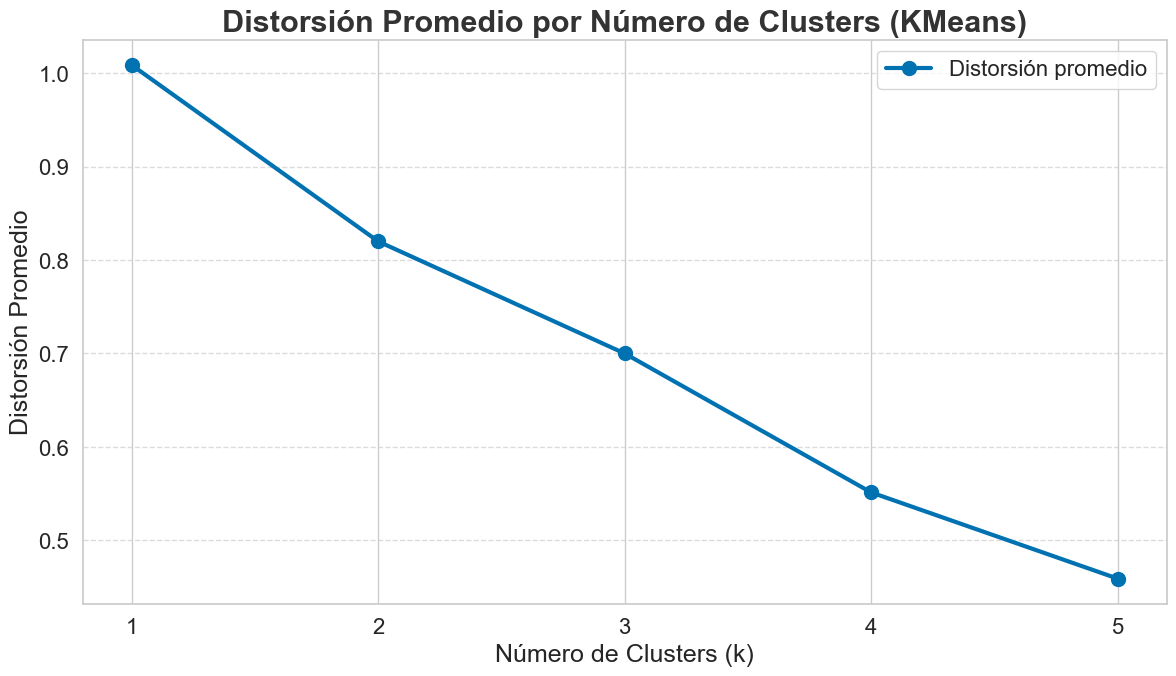

In [130]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

# Selecciona solo las columnas numéricas
num_cols = df2.select_dtypes(include=[np.number]).columns
df2_num = df2[num_cols]

clusters = range(1,6)
meanDistortions=[]

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(df2_num)
    prediction = model.predict(df2_num)
    meanDistortions.append(sum(np.min(cdist(df2_num, model.cluster_centers_, 'euclidean'), axis=1)) / df2_num.shape[0])

plt.figure(figsize=(12, 7))
plt.plot(clusters, meanDistortions, marker='o', color='#0072B2', linewidth=3, markersize=10, label='Distorsión promedio')
plt.title('Distorsión Promedio por Número de Clusters (KMeans)', fontsize=22, fontweight='bold', color='#333333')
plt.xlabel('Número de Clusters (k)', fontsize=18)
plt.ylabel('Distorsión Promedio', fontsize=18)
plt.xticks(clusters, fontsize=16)
plt.yticks(fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(fontsize=16, loc='best', frameon=True)
plt.tight_layout()
plt.show()

In [86]:
# El número de clusters adecuado parece ser 2, el cual se procede a utilizar como parámetro.

kmeans = KMeans(n_clusters=6, n_init = 15, random_state=1)
kmeans.fit(df2_num)

KMeans(n_clusters=6, n_init=15, random_state=1)

In [87]:
# Se generan los labels al que pertenecen los registros
df_labels = pd.DataFrame(kmeans.labels_, columns = list(['labels']))
df_labels['labels'] = df_labels['labels'].astype('category')

# Se genera la unión con el tercer DataFrame copia del original
df_labeled = df3.join(df_labels)
df_labeled.head(5)

,Año,Clave_Ent,Entidad,Cve. Municipio,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,...,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre,Suma_Delitos,labels
0,2015,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,4,...,0,1,1,5,2,5,6,4,36,0
1,2015,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Sin violencia,114,...,138,94,89,93,126,105,152,171,1434,3
2,2015,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de motocicleta Con violencia,1,...,0,0,0,2,0,0,1,0,5,0
3,2015,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de motocicleta Sin violencia,23,...,23,17,8,33,29,33,39,34,304,4
4,2015,1,Aguascalientes,1002,Asientos,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,0,...,0,0,0,0,0,1,0,1,2,0


labels
0    40740
4     2295
1      592
3      169
5       43
2       20
Name: count, dtype: int64


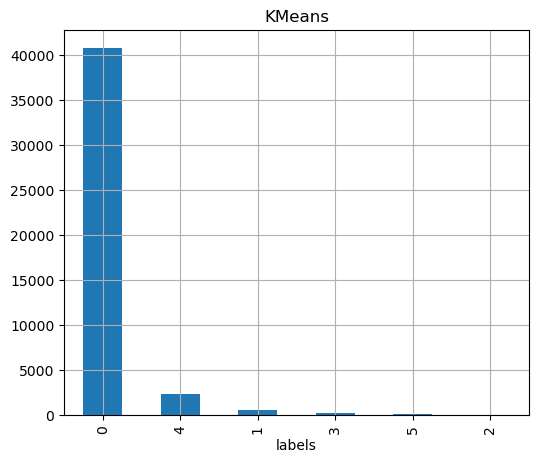

In [88]:
print(df_labeled['labels'].value_counts())

fig, ax = plt.subplots(1,1, figsize=(6,5))
pd.value_counts(df_labeled["labels"]).plot(kind='bar').set_title('KMeans')
plt.show()

In [89]:
from sklearn.metrics import silhouette_score

sil_list = []
clusters = range(2, 7)

for n_clusters in clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    preds = clusterer.fit_predict(df2_num)
    centers = clusterer.cluster_centers_
    score = silhouette_score(df2_num, clusterer.labels_, metric='euclidean')
    sil_list.append({'Model': 'Kmeans', 'n_clusters': n_clusters, 'score': score})

sil_df = pd.DataFrame(sil_list)

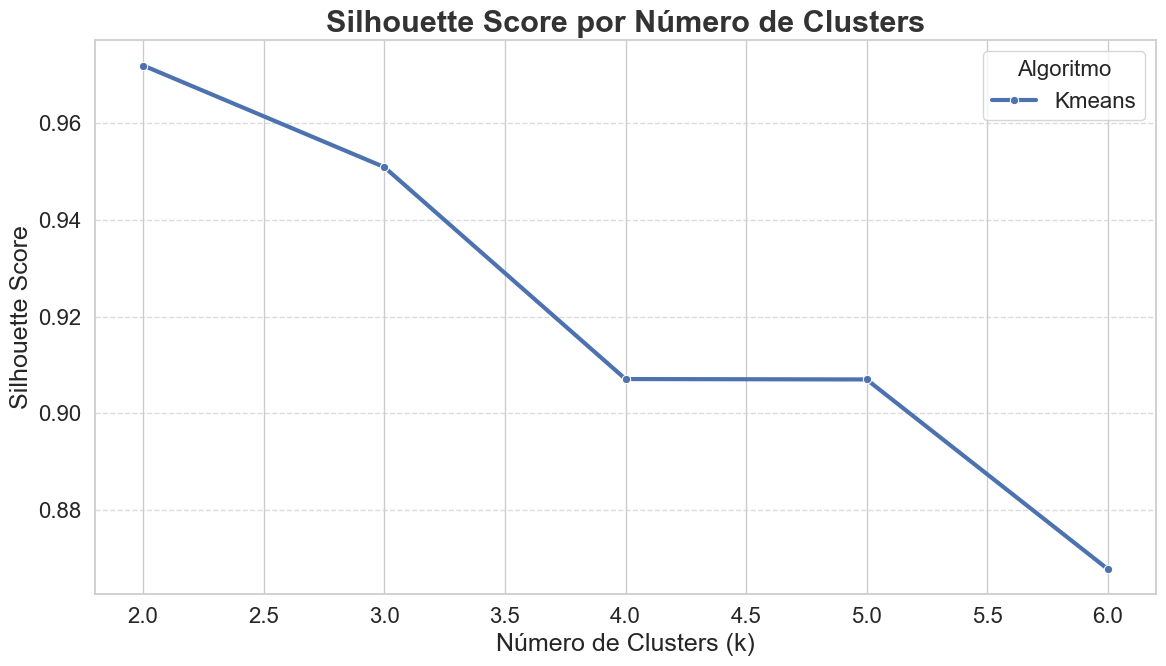

In [131]:
plt.figure(figsize=(12, 7))
sns.set(style="whitegrid", font_scale=1.5)
ax = sns.lineplot(
    data=sil_df,
    x='n_clusters',
    y='score',
    hue='Model',
    style='Model',
    markers=True,
    dashes=False,
    linewidth=3
)
ax.set_title('Silhouette Score por Número de Clusters', fontsize=22, fontweight='bold', color='#333333')
ax.set_xlabel('Número de Clusters (k)', fontsize=18)
ax.set_ylabel('Silhouette Score', fontsize=18)
ax.legend(title='Algoritmo', fontsize=16, title_fontsize=16, loc='best', frameon=True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [132]:
# Agrupa por cluster y calcula el promedio de delitos por mes
meses = ['Enero','Febrero','Marzo','Abril','Mayo','Junio','Julio','Agosto','Septiembre','Octubre','Noviembre','Diciembre']
cluster_means = df_labeled.groupby('labels')[meses].mean()

print(cluster_means)
# # Identifica el cluster con los valores más altos
# print("Meses más peligrosos por cluster:")
# print(cluster_means.idxmax())

        Enero  Febrero  Marzo  Abril   Mayo  Junio  Julio  Agosto  Septiembre  \
labels                                                                          
0        0.99     0.90   0.96   0.88   0.93   0.91   0.80    0.82        0.82   
1       52.84    49.10  52.43  47.44  50.71  48.63  49.79   49.10       48.02   
2      560.05   522.55 543.80 500.25 536.60 503.05 498.25  515.95      507.90   
3      128.76   117.61 126.55 116.93 122.30 119.51 116.55  117.82      116.78   
4       17.39    15.71  16.69  15.32  15.84  15.69  14.94   15.37       15.01   
5      239.77   220.37 237.42 222.40 236.30 236.58 248.37  253.37      219.98   

        Octubre  Noviembre  Diciembre  
labels                                 
0          0.86       0.85       0.84  
1         50.63      48.58      48.07  
2        537.20     543.30     536.85  
3        123.89     119.83     112.83  
4         16.05      15.59      15.03  
5        237.74     225.44     221.30  


In [133]:
cluster_peligroso = 2

# Filtra los registros del cluster más peligroso
df_peligrosos = df_labeled[df_labeled['labels'] == cluster_peligroso]

# Agrupa por estado y suma los delitos
estados_peligrosos = df_peligrosos.groupby('Entidad')[meses].sum().sort_values(by=meses, ascending=False)

estados_peligrosos.T

Entidad,Baja California,México,Jalisco
Enero,6759,3461,981
Febrero,6181,3268,1002
Marzo,6420,3444,1012
Abril,6070,3081,854
Mayo,6239,3580,913
Junio,5706,3340,1015
Julio,5821,3122,1022
Agosto,5923,3328,1068
Septiembre,5828,3334,996
Octubre,6090,3548,1106
